In [132]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from random import random

In [90]:
def dist(p1, p2):
    d = np.sqrt(np.power(p2[0]-p1[0],2) + np.power(p2[1]-p1[1],2) + np.power(p2[2]-p1[2],2))
    return d

In [115]:
def create_a_row(p1, p2, x0, dimensions=3):
    """
    A = (x-a/rB1 - x-d/rB2), (y-b/rB1 - x-3/rB2), (z-c/rB1 - x-f/rB2)
    """
    row = []
    for i in range(dimensions):
        row.append((x0[i] - p1[i])/dist(x0,p1) - (x0[i] - p2[i])/dist(x0,p2))
    
    return row
    

In [153]:
def create_fx(p1, p2, x0):
    return dist(p1, x0) - dist(p2, x0)

In [116]:
source_pos = [0,0,0]
r1_pos = [-10, 20, 15]
r2_pos = [-2, 15, -2]
r3_pos = [15, -10, 5]
r4_pos = [3, -7, -10]
r5_pos = [12, 10, -5]
r6_pos = [-8, -2, 4]

rovers = [r1_pos, r2_pos, r3_pos, r4_pos, r5_pos, r6_pos]

<IPython.core.display.Javascript object>


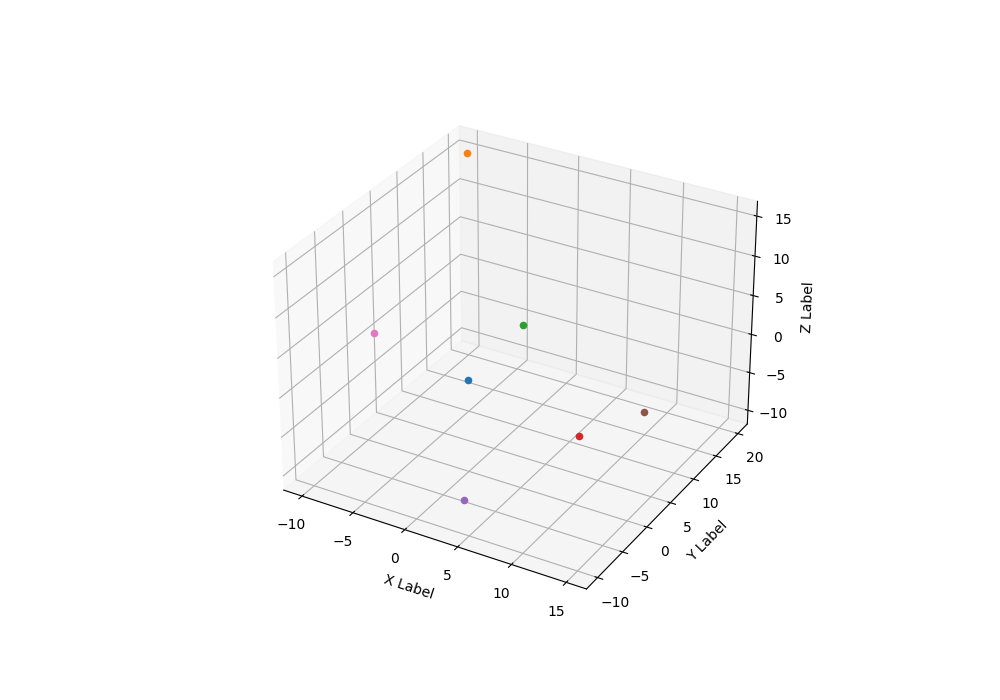

In [117]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter(source_pos[0], source_pos[1], source_pos[2])
for item in rovers:
    ax.scatter(item[0], item[1], item[2])
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

# Create observations

In [206]:
tdoa_obs = []
num_obs = len(rovers)
for i, r in enumerate(rovers):
    for j, ref in enumerate(list(range(i, num_obs))):
        if i != j:
            tdoa_obs.append((i, j, (dist(rovers[j], source_pos) - dist(rovers[i], source_pos)) + random()*10))


In [207]:
# initial pos
x0 = [1,1,1]

In [208]:
# Create A and w


for i in range(15):

    a_mat_list = []
    w_list = []
    for obs in tdoa_obs:
        a_mat_list.append(create_a_row(rovers[obs[0]], rovers[obs[1]], x0))
        fx =  create_fx(rovers[obs[1]], rovers[obs[0]], x0)
    #     print(f'{obs[2]} - {fx})')
        w_list.append(fx - obs[2] )

    A = np.array(a_mat_list)
    w = np.array(w_list)
    N = np.matmul(np.transpose(A), A)
    U = np.matmul(np.transpose(A), w)
    delta = np.matmul(np.linalg.inv(N),U)
#     print(f'{x0}, {delta}')
    x0 = x0 + delta

print(f'Resulting pos: {x0},\t{dist(x0,source_pos)} m away from truth')

Resulting pos: [ 0.34776966 -0.83066592  0.32996535],	0.9590759802254546 m away from truth


array([-0.29926286, -0.63167461, -0.02278188])